In [ ]:
!pip install git+https://github.com/vincent-noel/pyMaBoSS.git@feat/uppmaboss_nodes_tables
!python -m maboss_setup
import os
os.environ["PATH"] += ":/usr/local/share/colomoto/bin/"

In [1]:
import maboss, time

When running the notebook locally, prefix should be "", otherwise it's the url of the folder from github.

In [2]:
# prefix = ""
prefix = "https://raw.githubusercontent.com/vincent-noel/TregModel/master/"

## Simulation of TCR2 activation

#### Initial

In [3]:
t0 = time.time()
upp_actr2 = maboss.UpdatePopulation(
    maboss.load(
        prefix+"TregModel_InitPop.bnd",
        prefix+"TregModel_InitPop_ActTCR2.cfg",
    ),
    prefix+"TregModel_InitPop.upp"
)

upp_actr2_result = upp_actr2.run(workdir="TregModel_InitPop")

serie_actr2 = upp_actr2_result.get_population_ratios()
serie_actr2.name = "TCR2 activation"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 0.85s


In [4]:
t0 = time.time()
upp_actr2_tgfb = maboss.UpdatePopulation(
    maboss.load(
        prefix+"TregModel_InitPop.bnd",
        prefix+"TregModel_InitPop_ActTCR2_TGFB.cfg",
    ),
    prefix+"TregModel_InitPop.upp"
)

upp_actr2_tgfb_result = upp_actr2_tgfb.run(workdir="TregModel_InitPop_TGFB")

serie_actr2_tgfb = upp_actr2_tgfb_result.get_population_ratios()
serie_actr2_tgfb.name = "TCR2 activation + TGFB"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 0.73s


In [5]:
t0 = time.time()
spd_actr2 = upp_actr2_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 435.49s


In [6]:
t0 = time.time()
spd_actr2_tgfb = upp_actr2_tgfb_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 777.60s


In [7]:
t0 = time.time()

npd_actr2 = upp_actr2_result.get_nodes_stepwise_probability_distribution(
    nodes=["IL2", "TGFB"], 
    nb_cores=6
)
print("Node table computed in %.2fs" % (time.time()-t0))

Node table computed in 14.85s


In [8]:
t0 = time.time()
npd_actr2_tgfb = upp_actr2_tgfb_result.get_nodes_stepwise_probability_distribution(
    nodes=["IL2", "TGFB"], 
    nb_cores=6
)
print("Node table computed in %.2fs" % (time.time()-t0))

Node table computed in 64.43s


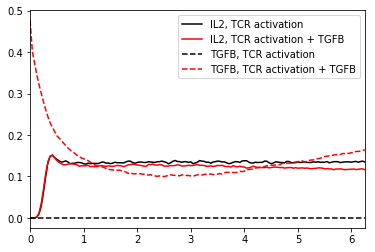

In [9]:
serie_actr_il2 = npd_actr2.loc[:, "IL2"].copy()
serie_actr_il2.name = "IL2, TCR activation"
serie_actr_il2.index/=24
serie_actr_il2.plot(legend=True, color='black')

serie_actr_tgfb_il2 = npd_actr2_tgfb.loc[:, "IL2"].copy()
serie_actr_tgfb_il2.name = "IL2, TCR activation + TGFB"
serie_actr_tgfb_il2.index/=24
serie_actr_tgfb_il2.plot(legend=True, color='red')

serie_actr_tgfb = npd_actr2.loc[:, "TGFB"].copy()
serie_actr_tgfb.name = "TGFB, TCR activation"
serie_actr_tgfb.index/=24
serie_actr_tgfb.plot(legend=True, color='black', linestyle='--')


serie_actr_tgfb_tgfb = npd_actr2_tgfb.loc[:, "TGFB"].copy()
serie_actr_tgfb_tgfb.name = "TGFB, TCR activation + TGFB"
serie_actr_tgfb_tgfb.index/=24
serie_actr_tgfb_tgfb.plot(legend=True, color='red', linestyle='--')
